# Live Code Phase 0

Nama : **Dafa Wiratama**
Batch : **Batch 09 Data Science**

# Problems

## Question 1:

Perang sedang berkecamuk! Tentara negara kita ingin melakukan komunikasi ke sekutunya tanpa diketahui oleh negara musuh. Untuk itu, kamu diminta untuk mengubah pesan kalimat menjadi pesan transmisi.

  Pesan yang ingin dikirim adalah: "**Prepare to negotiate**".

 ### Instruksi/Clue No. 1:
  <ol type="a">
  <li> Mengubah sebuah pesan berupa kalimat ke kode/pesan transmisi yang berupa kumpulan angka disebut sebagai <i>encode</i> dan sebaliknya disebut <i>decode</i>. Cara untuk melakukan <i>encode</i> adalah dengan mengalikan matriks yang berisikan pesan kalimat dengan matriks encoder. </li>
  <li> Konversikan tiap karakter pada pesan di atas ke dalam angka dan simpan ke dalam numpy array (Boleh pakai metode/teknik apapun). Contoh: A=1, Z=26, dan spasi=0. Untuk kalimat "Siap bersedia" akan terkonversi menjadi np.array([19,9,1,16,0,2,5,18,19,5,7,9,1]). </li>
  <li> Numpy array yang masih berupa 1D-array (vektor) dapat diubah ke matriks (2-D array) dengan menggunakan method reshape (NumPy). (Ukuran matriks menyesuaikan dengan ukuran encode matriks sehingga bisa dikalikan). Matriks ini akan kita sebut sebagai <strong>matriks pesan</strong>. <strong><i>[Memenuhi Rubrik Penilaian Nomor 1a]</i></strong>. </li>
  <li> Untuk mengkonversi kalimat ke kode transmisi, buatlah <strong>matriks encoder</strong> 4x4 berikut: </li>
  <li> Kalikan <strong>matriks encoder</strong> yang telah ditentukan dengan <strong>matriks pesan</strong>. Tunjukkan bahwa pesan sudah berhasil di-encode (Perkalian dua matriks berhasil menghasilkan matriks baru yang kita namakan sebagai <strong>matriks transmisi</strong>). <strong><i>[Memenuhi Rubrik Penilaian Nomor 1b]</i></strong> </li>
  <li> Agar menyakinkan apakah perhitungan kamu sudah benar, lakukan decode pesan yang sudah di-encode dengan cara mengalikan <strong>matriks transmisi</strong> dengan <strong>inverse matriks encoder</strong>, E. Hasil perkalian matriksnya akan kita sebut sebagai <strong>matriks decoded</strong> Tunjukkan bahwa matriks hasil decode sama dengan matriks pesan sebelum di-encode. (Kamu bisa pakai bantuan <i>np.allclose</i> untuk mengecek matriks decoded dengan matriks pesan sama atau tidak). </li>
</ol>


### Pertanyaan yang harus dijawab:
1. Pada langkah c, berapa ukuran matriks yang pesan yang memungkinkan untuk dapat dikalikan dengan matriks encoder? dan mengapa jawabannya demikian? <strong><i>[Memenuhi Rubrik Penilaian Nomor 2a - 5 Pt]</i></strong>
2. Apakah susunan perkalian yang benar antara **matriks pesan x matriks encoder** atau **matriks encoder x matriks pesan** sama saja? jika sama, mengapa? dan jika berbeda mengapa demikian dan susunan mana yang benar?<strong><i>[Memenuhi Rubrik Penilaian Nomor 2a - 5 Pt]</i></strong>
3. Pada langkah f, untuk melakukan decoding, digunakan perkalian antara matriks transmisi dengan inverse matriks encoder dimana harapannya hasil perkaliannya menghasilkan matriks yang sama/mirip dengan matriks pesan. Mengapa mengalikan matriks transmisi dengan inverse matriks encoder dan mengapa tidak dengan matriks encoder biasa saja tanpa di-inverse?<strong><i>[Memenuhi Rubrik Penilaian Nomor 2a - 5 Pt]</i></strong>


## Question 2:
Dalam training data dengan model machine learning, salah satu metrik yang dapat dijadikan referensi untuk mengevaluasi kecocokan antara model dan data adalah ROC (Receiver Operating Charateristics) curve. ROC curve dibangun dari hubungan antara False Positive Rate/FPR (sumbu X) dan True Positive Rate/TPR (sumbu Y), masing-masing bernilai dari 0-1. Selain ROC Curve, kadangkala orang mengevaluasi model menggunakan ROC AUC score yang tidak lain adalah luas area di bawah kurva ROC. Untuk menghitung ROC AUC score, gunakan konsep integral.

  Pada dataset yang tersedia, hitung nilai ROC AUC score untuk masing-masing model Random Forest Regressor dan Support Machine Regressor (SVR). Manakah yang terbaik? (Model terbaik adalah yang ROC Score nya paling besar dan mendekati 1). **SEBELUM MENYELESAIKAN PROBLEM DENGAN CODE, JAWAB PERTANYAAN DI BAWAH**.

 ### Pertanyaan yang harus dijawab:
 1. Jenis integral apakah untuk menghitung luas area di bawah kurva ROC? mengapa demikian? <strong><i>[Memenuhi Rubrik Penilaian Nomor 2b - 5 Pt]</i></strong>
 2. Untuk menyelesaikan persoalan menghitung ROC AUC score, metode apa yang kita pakai, simbolik atau numerik? apakah perlu pendefinisian fungsi matematis? <strong><i>[Memenuhi Rubrik Penilaian Nomor 2b - 5 Pt]</i></strong>


# Library Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Answer
### Question 1:
#### Variable Declaration
in this section we will declare all the variable that we will use in this problem.
- message = this variable is the message that we will be sending to the receiver.
- encrypt_key = this variable is the matrix 4x4 that we will use to encrypt the message.
- decrypt_key = this variable is the inverse matrix from the encrypt_key.

In [2]:
message = "Prepare to negotiate"

encrypt_key = np.array([
    [2, 1, 0, 4],
    [3, 4, 2, 1],
    [1, 1, 9, 0],
    [0, 7, 8, 3]
])

decrypt_key = np.linalg.inv(encrypt_key)

#### Function Definition
after all variable are declared, we will define all the function that we will use in this problem.

##### Frame Message
this 2 function will be used to frame the message that we will be sending to the receiver.
in this case we will be transforming the message into integer representation of the character then transforming it into 4xN matrix. and the second one is use to convert the matrix frame into string message

In [3]:
def message_to_frame(message: str):
    frame = np.zeros((4, int(np.ceil(len(message) / 4))))
    for i, c in enumerate(message):
        frame[i % 4, i // 4] = ord(c)
    return frame


def frame_to_message(frame: np.ndarray):
    message = ""
    for i in range(frame.size):
        c = round(frame[i % 4, i // 4])
        if c != 0:
            message += chr(c)
    return message


##### Encode-Decode Message
and this function will be used to encode and decode the message.
- encrypt
this function will be used to encrypt the message by transforming the message into integer representation, transforming it into 4xN matrix. then calculate the dot product of the message and the encrypt_key to produce encrypted message.
- decrypt
this function will be use to decrypt the message by calculate the dot matrix of the encrypted message and the decrypt_key to produce the original frame then convert the frame into string message.

In [4]:
def encrypt(message: str, key: np.ndarray) -> np.ndarray:
    frame = message_to_frame(message)
    return np.dot(key, frame)


def decrypt(frame: np.ndarray, key: np.ndarray) -> np.ndarray:
    frame = np.dot(key, frame)
    return frame_to_message(frame)

##### Summary
after all variable and function are declared, we will try our algorithm to encrypt and decrypt the message.
as we can see from this example bellow that the message will be encoded with encrypt key then decoded with the inverse of the encrypt key. to produce the original message.

In [5]:

print(f"Message: {message}")

print(f"\nEncrypt Key:\n{encrypt_key}")
print(f"\nDecrypt Key:\n{decrypt_key}")

encrypted_message = encrypt(message, encrypt_key)
decrypted_message = decrypt(encrypted_message, decrypt_key)

print(f"\nEncrypted Message:\n{encrypted_message}")
print(f"\nDecrypted Message:\n{decrypted_message}")

print(f"\nThe Message Was Decoded Correctly: {message == decrypted_message}")

Message: Prepare to negotiate

Encrypt Key:
[[2 1 0 4]
 [3 4 2 1]
 [1 1 9 0]
 [0 7 8 3]]

Decrypt Key:
[[ 0.06325707  0.25975774  0.09421265 -0.17092867]
 [-0.11170929  0.11574697 -0.12382234  0.11036339]
 [ 0.00538358 -0.04172275  0.11440108  0.00672948]
 [ 0.24629879 -0.15881561 -0.01615074  0.05787349]]

Encrypted Message:
[[ 722.  436.  783.  769.  711.]
 [1010.  981.  966. 1053. 1036.]
 [1103. 1120.  515. 1203. 1246.]
 [1942. 1702. 1363. 1957. 1910.]]

Decrypted Message:
Prepare to negotiate

The Message Was Decoded Correctly: True


### Question :
1. Pada langkah c, berapa ukuran matriks yang pesan yang memungkinkan untuk dapat dikalikan dengan matriks encoder? dan mengapa jawabannya demikian? [Memenuhi Rubrik Penilaian Nomor 2a - 5 Pt]
2. Apakah susunan perkalian yang benar antara matriks pesan x matriks encoder atau matriks encoder x matriks pesan sama saja? jika sama, mengapa? dan jika berbeda mengapa demikian dan susunan mana yang benar?[Memenuhi Rubrik Penilaian Nomor 2a - 5 Pt]
3. Pada langkah f, untuk melakukan decoding, digunakan perkalian antara matriks transmisi dengan inverse matriks encoder dimana harapannya hasil perkaliannya menghasilkan matriks yang sama/mirip dengan matriks pesan. Mengapa mengalikan matriks transmisi dengan inverse matriks encoder dan mengapa tidak dengan matriks encoder biasa saja tanpa di-inverse?[Memenuhi Rubrik Penilaian Nomor 2a - 5 Pt]

#### Answer :
1. Ukuran matriks yang memungkinkan untuk dapat dikalikan dengan matriks encoder adalah 4xN. karena susuari dengan peraturan perkalian Matrix,
Baris ukuran baris Matrix A haruslah sama dengan kolom dari matrix yang lain ((N,A) * (B,N)).
2. Susunan dari Perkalian Matrix Sangatlah berpengaruh terhadap hasil perkalian Matrix (AB != BA).
karena kolom Matrix A haruslah sama dengan baris dari matrix yang lain ((N,A) * (B,N)). dan juga nilai dari perkalian tersebut tidak lah sama jika dibalik saat kondisi pertama terpenuhi.
3. karena sesuai dengan peraturan perkalian matrix untuk mendapatkan nilai asal A dari perkalian Matrix AB maka kita diharuskan untuk mencari inverse dari Matrix B. untuk medapatkan nilai A dari hasil per kalian CB
- A : Pesan
- B : Encoder
- C : Transmisi

### Question 2:
1. Jenis integral apakah untuk menghitung luas area di bawah kurva ROC? mengapa demikian? [Memenuhi Rubrik Penilaian Nomor 2b - 5 Pt]
2. Untuk menyelesaikan persoalan menghitung ROC AUC score, metode apa yang kita pakai, simbolik atau numerik? apakah perlu pendefinisian fungsi matematis? [Memenuhi Rubrik Penilaian Nomor 2b - 5 Pt]

#### Answer :
1. Integral dari fungsi ROC adalah luas area di bawah kurva ROC yang dapat dihitung dengan metode trapezoidal.
2. Metode trapezoidal untuk menghitung luas area di bawah kurva ROC. kita menggunakan perhitungan numerical karena nilai yang kita ketahui merupakan nilai interpolasi dari fungsi aslinya. bukan nilai yang dapat diketahui secara matematis (D = A * B + C).

#### Dataset Preparation
in this section we will be loading the dataset from URL and from the dataset we can see that there are 4 columns.
1. svr_fpr : false positive rate of support vector machine
2. svr_tpr : true positive rate of support vector machine
3. rfr_fpr : false positive rate of random forest
4. rfr_tpr : true positive rate of random forest

In [6]:
url = "https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/ROC%20Curve%20SVR%20-%20Random%20Forest.csv?token=AEZDEHVS66CKQBUSHKZ534TA44EVO"
df = pd.read_csv(url, index_col=0)
df.head()

,svr_fpr,svr_tpr,rfr_fpr,rfr_tpr
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.015152,0.000000,0.030303
2,0.004831,0.030303,0.000000,0.060606
3,0.009662,0.030303,0.000000,0.106061
4,0.012077,0.045455,0.002415,0.121212


#### Visualization
in this section we will be visualizing the dataset using matplotlib.
ROC curve is a graph that shows the true positive rate (TPR) and false positive rate (FPR) for each method.

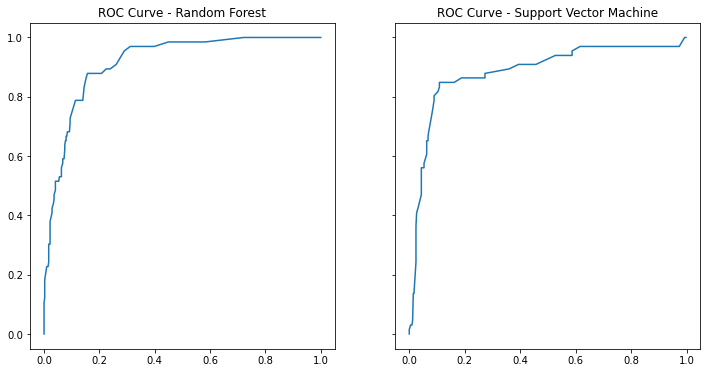

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax[0].plot(df['rfr_fpr'], df['rfr_tpr'])
ax[0].set_title('ROC Curve - Random Forest')
ax[1].plot(df['svr_fpr'], df['svr_tpr'], label='ROC Curve - Support Vector Machine')
ax[1].set_title('ROC Curve - Support Vector Machine');

#### Conclusion :
from the visualization we can see that the ROC curve of random forest is better than the ROC curve of support vector machine.
so the random forest is the best model for this problem.

###### Question 3:
Manakan model yang terbaik berdasarkan hasil perhitungan ROC AUC score? jelaskan mengapa! [Memenuhi Rubrik Penilaian Nomor 2b - 5 Pt]
- Random Forest

In [8]:
support_vector_score = np.trapz(df["svr_tpr"], df["svr_fpr"])
random_forest_score = np.trapz(df["rfr_tpr"], df["rfr_fpr"])

print("Support Vector Machine Score : ", support_vector_score)
print("Random Forest Score : ", random_forest_score)

Support Vector Machine Score :  0.8817889035280342
Random Forest Score :  0.9160262040696824
